# Multiple Linear Regression
## Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [105]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

In [83]:
# importing library
import numpy as np
import pandas as pd

In [84]:
housing = pd.read_csv("/content/sample_data/Housing.csv")

In [85]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [86]:
housing.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


Inspect the various aspects of the housing dataframe

In [88]:
housing.shape

(545, 13)

In [89]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [90]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

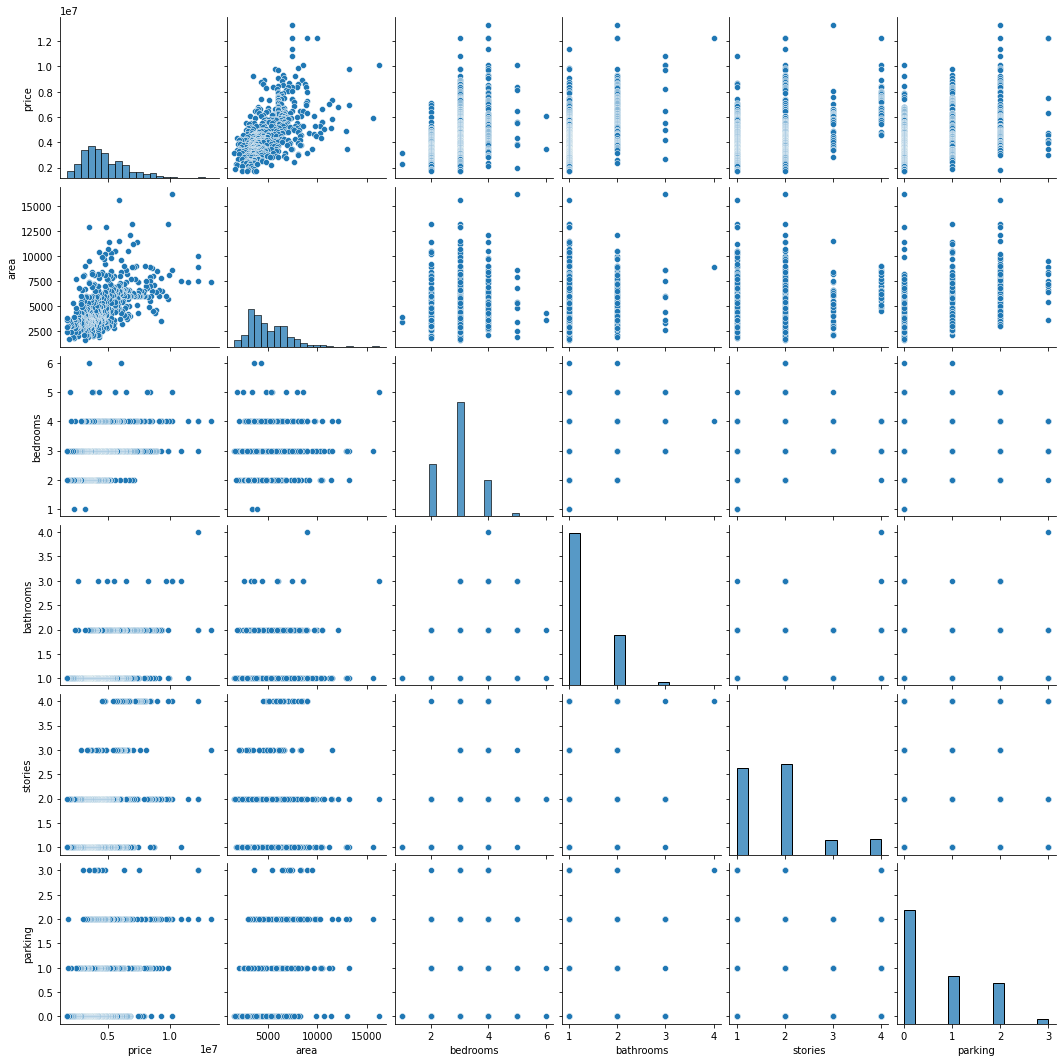

In [92]:
sns.pairplot(housing)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

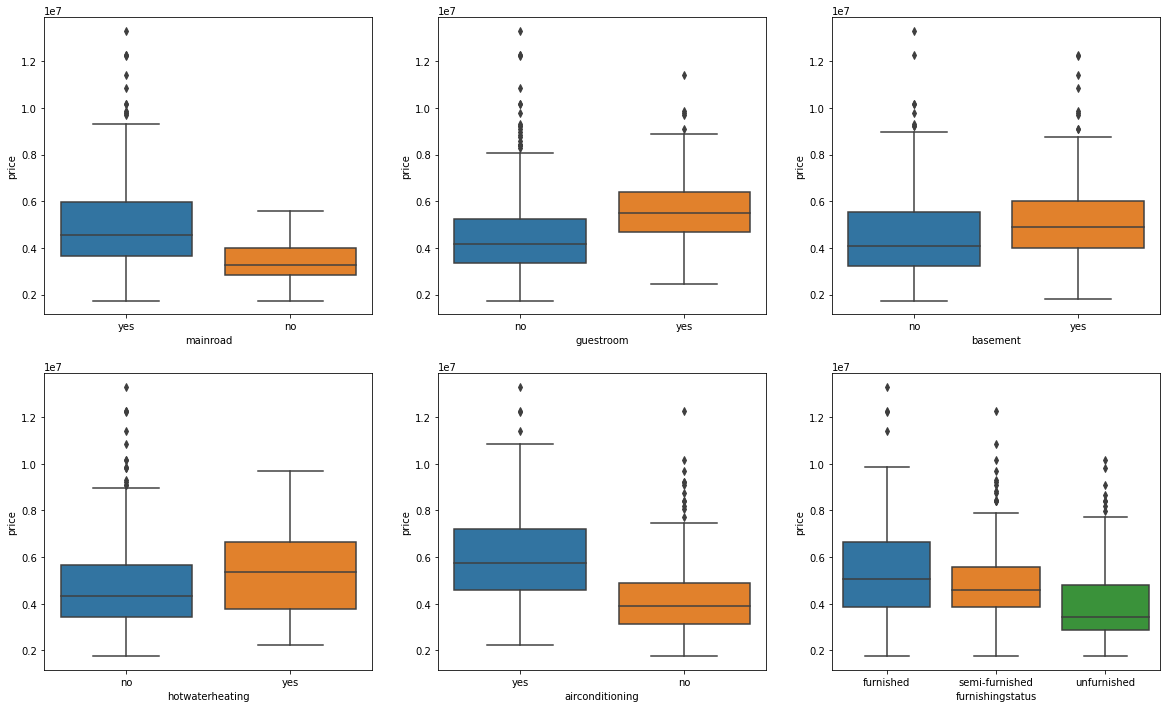

In [93]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `furnishingstatus` with `airconditioning` as the hue.

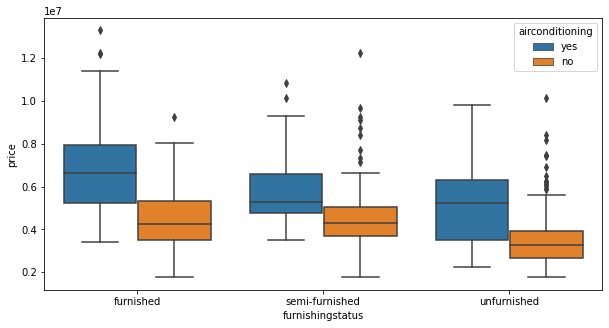

In [94]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

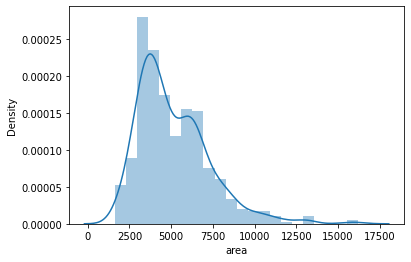

In [95]:
#area column distribution
sns.distplot(housing["area"])

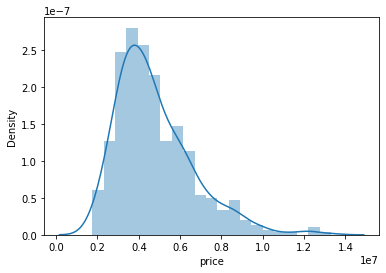

In [96]:
#price column distribution
sns.distplot(housing["price"])

## Step 3: Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [97]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

"""
Below function is allternative approach to perform same thing
def category_conversion(x):
  if x =="yes":
    return 1
  else:
    return 0"""

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [98]:
# Check the housing dataframe now

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Dummy Variables

The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [99]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
# We always use dummy variable creation for nimial category column like week days or Month colums
status = pd.get_dummies(housing['furnishingstatus'])

In [100]:
# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [ ]:
# Let's drop the first column from status df using 'drop_first = True'

#status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [101]:
# Add the results to the original housing dataframe

housing = pd.concat([housing, status], axis = 1)

In [102]:
# Now let's see the head of our dataframe.

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0


In [103]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [104]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [107]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [108]:
df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,1,0,0
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,1,0,0
91,6419000,6750,2,1,1,1,1,1,0,0,2,1,1,0,0
118,5950000,6420,3,1,1,1,0,1,0,1,0,1,1,0,0
472,3010000,3630,4,1,2,1,0,0,0,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,2310000,3180,2,1,1,1,0,0,0,0,0,0,0,0,1
53,7350000,5150,3,2,4,1,0,0,0,1,2,0,0,1,0
350,3780000,3420,2,1,2,1,0,0,1,0,1,0,0,1,0
79,6650000,6000,3,2,3,1,1,0,0,1,0,0,1,0,0


In [109]:
df_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,0,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,0,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,0,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,3150000,6750,2,1,1,1,0,0,0,0,0,0,0,1,0
320,4060000,4320,3,1,2,1,0,0,0,0,2,1,1,0,0
424,3360000,3100,3,1,2,0,0,1,0,0,0,0,0,1,0
338,3885000,3780,2,1,2,1,1,1,0,0,0,0,0,1,0


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
scaler = MinMaxScaler()

In [112]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# Apply scaling only on continuous variable not on dummy variable
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [113]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
22,0.596970,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,1,0,0
41,0.527273,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,1,0,0
91,0.404242,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,1,0,0
118,0.363636,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,1,0,0
472,0.109091,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,0,1,0


In [114]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,0.263699,0.230390,0.388532,0.097095,0.272936,0.862385,0.172018,0.353211,0.055046,0.300459,0.243884,0.231651,0.259174,0.412844,0.327982
std,0.161666,0.149756,0.145923,0.167627,0.294125,0.344891,0.377830,0.478517,0.228332,0.458984,0.287502,0.422372,0.438685,0.492911,0.470017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.119848,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.223333,0.186508,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.351061,0.319131,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


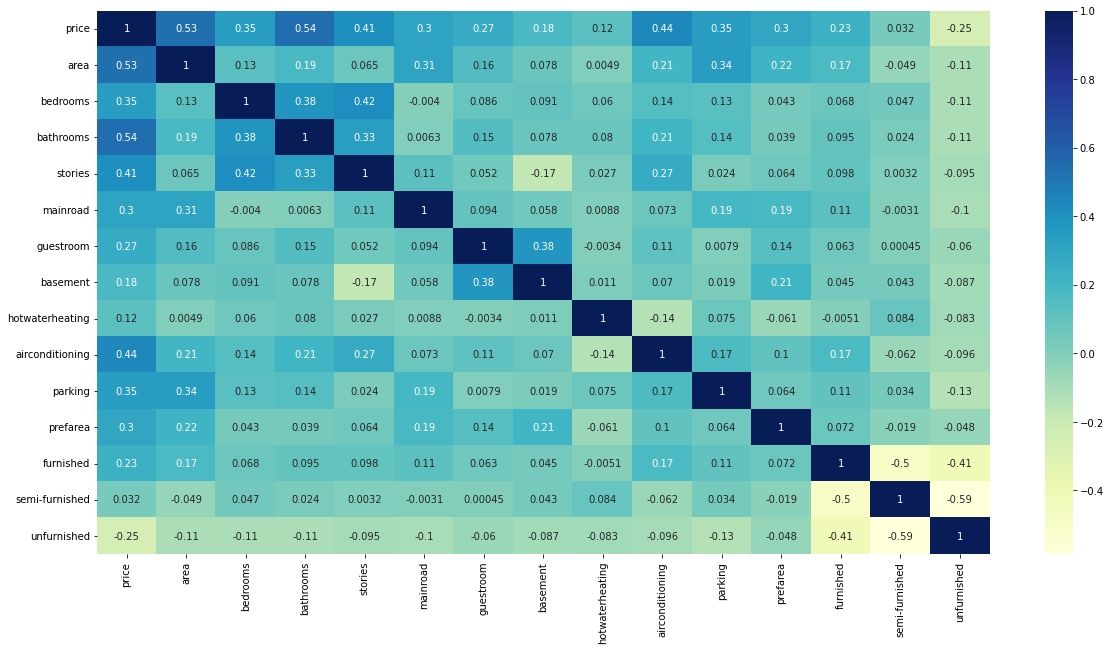

In [116]:
# Let's check the correlation coefficients to see which variables are highly correlated
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot= True,cmap="YlGnBu")
plt.show()

As you might have noticed, `area` seems to the correlated to `price` the most. Let's see a pairplot for `area` vs `price`.

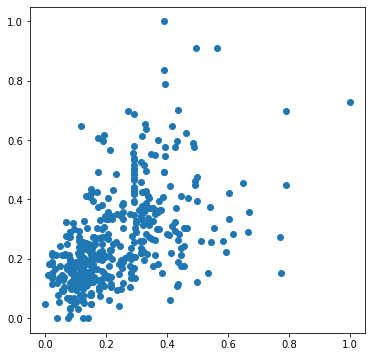

In [117]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.area, df_train.price)
plt.show()

So, we pick `area` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [118]:
y_train = df_train.pop('price')
X_train = df_train

In [119]:
X_train.shape

(436, 14)

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

### Adding all the variables to the model

In [120]:
# Check all the columns of the dataframe

housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [121]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)


In [122]:
print(X_train_lm.shape)
print(X_train_lm.columns)

(436, 15)
Index(['const', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')


In [123]:
X_train_lm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
22,1.0,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,1,0,0
41,1.0,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,1,0,0
91,1.0,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,1,0,0
118,1.0,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,1,0,0
472,1.0,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,0,1,0


In [124]:
#OLS :  Ordinary Least Square
#fit(): to train model
lr_1 = sm.OLS(y_train,X_train_lm).fit()

In [125]:
lr_1.params

const              0.008317
area               0.302778
bedrooms           0.039274
bathrooms          0.295439
stories            0.105427
mainroad           0.049794
guestroom          0.033324
basement           0.024047
hotwaterheating    0.073407
airconditioning    0.073167
parking            0.062824
prefarea           0.052335
furnished          0.018044
semi-furnished     0.009215
unfurnished       -0.018942
dtype: float64

In [126]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     68.41
Date:                Sun, 15 May 2022   Prob (F-statistic):           3.51e-95
Time:                        03:14:13   Log-Likelihood:                 423.49
No. Observations:                 436   AIC:                            -819.0
Df Residuals:                     422   BIC:                            -761.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0083      0.013     

###Dep. Variable :
It is the target(depndent) variable the model is learning (column "strenght" in this model).

###Model :
It is the Ordinary Least Squares as we use smf.ols function.

###Df Residuals:
It is another name is Degrees of Freedom. This is calculated in the form of ‘n-k-1’ or (number of observations-number of predicting variables-1).

###Df Model: 
numbers our predicting variables.

The degrees of freedom df is equal to the sample size minus the number of parameters we’re trying to estimate.

For example, if we’re estimating 2 parameters β0 and β1 as in:

Y = β0 + β1X + ε

Then, df = n – 2

If we’re estimating 3 parameters, as in:

Y = β0 + β1X1 + β2X2 + ε

Then, df = n – 3

###Covariance : 
Type is listed as nonrobust. Covariance is a measure of how two variables are linked in a positive or negative manner, and a robust covariance is one that is calculated in a way to minimize or eliminate variables, which is not the case here. Robust covariance methods are based on the fact that outliers lead to an increase of the values and making the spread of the data apparently larger.

###R-squared : 
R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables.Note that adding features to the model won’t decrease R-squared. This is because the model can find the same fit as before when more features are added. More often the R-squared increases by chance when adding features. Here R-squared value is 0.681, then it means that the independent variables explain 68.1% of the variation in the target variable.

###Adjusted R-squared : 
Linear regression has the quality that your model’s R-squared value will never go down with additional variables, only equal or higher. Therefore, your model could look more accurate with multiple variables even if they are poorly contributing. The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly. This property of Adjusted R-squared may be used to find the features that give the best accuracy. Adj. R-squared is on the range between 0 to 1, where 1 indicates that the model explains all the variability of the response data around its mean. sklearn hasn’t got a function for calculating Adjusted R-squared as it also takes the number of samples and features. We can calculate it with the function:



###F-statistic :

The F-test of overall significance indicates whether your linear regression model provides a better fit to the data than a model that contains no independent variables.This type of model is also known as an intercept-only model.For the model with no independent variables, the intercept-only model, all of the model’s predictions equal the mean of the dependent variable. Consequently, if the overall F-test is statistically significant, your model’s predictions are an improvement over using the mean.

The F-test for overall significance has the following two hypotheses:

The null hypothesis states that the model with no independent variables fits the data as well as your model.
The alternative hypothesis says that your model fits the data better than the intercept-only model.

###Prob (F-Statistic) :

uses this number to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0. In this case, it is telling us 0.0% chance of this.

###Log-likelihood : 
Likelihood Ratio test (often termed as LR test) is a test to compare two models, concentrating on the improvement with respect to likelihood value. If we keep on adding predictor variables to a linear model, R-square will improve. This holds true for model likelihood value as well. But, the objective is to check if the improvement in likelihood is good enough or not!

we have a data set with two variables, X and Y. You have fitted a regression equation between the two and got estimates or coefficients. Now, the likelihood is a measure that tells you how likely is that you will get a dataset like what you have, given the regression equation.

So, higher the value of likelihood, better is the fit of the model. once a regression model is fit, we may like to measure the likelihood of the estimates, for which we look at the log of the likelihood value and call it Log Likelihood.

It is used to compare coefficient values for each variable in the process of creating the model. Log Likelihood value is a measure of goodness of fit for any model. Higher the value, better is the model.

We should remember that Log Likelihood can lie between -Inf to +Inf. Hence, the absolute look at the value cannot give any indication. We can only compare the Log Likelihood values between multiple models.

###AIC and BIC : 
Both used to compare the efficiency of models in the process of linear regression, using a penalty system for measuring multiple variables. These numbers are used for feature selection of variables.

https://medium.com/swlh/what-do-we-see-with-aic-bic-57b3e12685d

### coefficients

The sign of a coefficient tells us whether there is a positive or negative correlation between a feature and a target variable.The positive coefficient indicates when the feature increases, the mean of the target also increases. A negative coefficient indicates as the feature value decreases, the target tends to decrease.

###std error : 
The standard error is an estimate of the standard deviation of the coefficient, the amount it varies across cases. It can be thought of as a measure of the precision with which the regression coefficient is measured. The standard error of the coefficient is always positive.The smaller the standard error, the more precise the estimate.

Dividing the coefficient by its standard error calculates a t-value.If the p-value associated with this t-statistic is less than your alpha level, you conclude that the coefficient is significantly different from zero.

https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/regression-models/what-is-the-standard-error-of-the-coefficient/


###The t : 
It is related and is a measurement of the precision with which the coefficient was measured. A low std error compared to a high coefficient produces a high t statistic, which signifies a high significance for your coefficient.

###P>|t| : 
It is one of the most important statistics in the summary. The p-value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable. If there is no correlation, there is no association between the changes in the independent variable and the shifts in the dependent variable.

uses the following null and alternative hypotheses:

The null hypothesis (H0): variable has no correlation with the dependent variable.
The alternative hypothesis: (Ha): variable has correlation with the dependent variable.

If p-value < level of significance (0.05); then null hypothesis is rejected.
If p-value > level of significance (0.05); then we fail to reject the null hypothesis.
https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/

###[0.025 and 0.975] : 
They are both measurements of values of our coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.

###Omnibus :
It describes the normalcy of the distribution of our residuals using skew and kurtosis as measurements. A 0 would indicate perfect normalcy.

###Prob(Omnibus) :
It is a statistical test measuring the probability the residuals are normally distributed. A 1 would indicate perfectly normal distribution.

###Skew : 
It is a measurement of symmetry in our data, with 0 being perfect symmetry.

###Kurtosis : 
It measures the peakiness of our data, or its concentration around 0 in a normal curve. Higher kurtosis implies fewer outliers.

###Durbin-Watson :
It is a measurement for autocorrelation.Given the statistical value of 2.093, the test provides evidence that there is less positive autocorrelation present and it means that residual error terms has very less positive autocorrelation and is little bit dependent.

Durbin-Watson to test the autocorrelation in residuals

A common method of testing for autocorrelation is the Durbin-Watson test.

Look for Durbin – Watson (DW) statistic.It must lie between 0 and 4.

If DW = 2, or close to it, implies no autocorrelation
0 < DW < 2 implies positive autocorrelation
while 2 < DW < 4 indicates negative autocorrelation

###Jarque-Bera (JB) and Prob(JB) : 
They are alternate methods of measuring the same value as Omnibus and Prob(Omnibus) using skewness and kurtosis. We use these values to confirm each other.

Jarque-Bera Statistical test - To test Residuals are normally distributed

A Jarque-Bera test uses the following null and alternative hypotheses:

The null hypothesis (H0): Residuals are normally distributed.
The alternative hypothesis: (Ha): Residuals are not normally distributed.

If p-value < level of significance (0.05); then null hypothesis is rejected.
If p-value > level of significance (0.05); then we fail to reject the null hypothesis.
In this example, the Jarque-Bera statistic for the test is 5.30 and the corresponding p-value is 0.0704. Because this p-value is greater than 0.05, we will accept the null hypothesis. We do not have sufficient evidence to say that Residuals are not normally distributed in the regression model.

###Condition number : 
it is used as a diagnostic for multicollinearity. Multicollinearity is strongly implied by a high condition number. Multicollinearity a term to describe two or more independent variables that are strongly related to each other and are falsely affecting our predicted variable by redundancy.

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. VIFs are calculated by taking a predictor, and regressing it against every other predictor in the model.  It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $



In [127]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,furnished,inf
13,semi-furnished,inf
14,unfurnished,inf
4,stories,1.49
2,bedrooms,1.38
1,area,1.33
7,basement,1.32
3,bathrooms,1.31
6,guestroom,1.22
9,airconditioning,1.21


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `semi-furnished` as it has a very high p-value of `0.938`. Let's go ahead and drop this variables

In [129]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('semi-furnished', 1,)

In [130]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [131]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     68.41
Date:                Sun, 15 May 2022   Prob (F-statistic):           3.51e-95
Time:                        03:15:43   Log-Likelihood:                 423.49
No. Observations:                 436   AIC:                            -819.0
Df Residuals:                     422   BIC:                            -761.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0175      0.019     

In [132]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,6.91
4,mainroad,5.98
0,area,4.44
3,stories,2.77
9,parking,2.07
6,basement,2.03
2,bathrooms,1.72
8,airconditioning,1.72
11,furnished,1.65
12,unfurnished,1.63


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `bedroom` has a significantly high VIF (`6.6`) and a high p-value (`0.206`) as well. Hence, this variable isn't of much use and should be dropped.

In [133]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('bedrooms', 1)

In [134]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [135]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     73.97
Date:                Sun, 15 May 2022   Prob (F-statistic):           7.19e-96
Time:                        03:16:16   Log-Likelihood:                 422.88
No. Observations:                 436   AIC:                            -819.8
Df Residuals:                     423   BIC:                            -766.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0301      0.015     

In [136]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,5.14
0,area,4.31
2,stories,2.31
8,parking,2.04
5,basement,1.89
7,airconditioning,1.72
1,bathrooms,1.64
10,furnished,1.63
11,unfurnished,1.54
4,guestroom,1.47


### Dropping the variable and updating the model

As you might have noticed, dropping `semi-furnised` decreased the VIF of `mainroad` as well such that it is now under 5. But from the summary, we can still see some of them have a high p-value. `basement` for instance, has a p-value of 0.03. We should drop this variable as well.

In [137]:
X = X.drop('furnished', 1)

In [138]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [139]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     80.73
Date:                Sun, 15 May 2022   Prob (F-statistic):           1.04e-96
Time:                        03:17:40   Log-Likelihood:                 422.58
No. Observations:                 436   AIC:                            -821.2
Df Residuals:                     424   BIC:                            -772.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0322      0.014     

In [140]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.94
0,area,4.23
2,stories,2.30
8,parking,2.04
5,basement,1.88
7,airconditioning,1.70
1,bathrooms,1.64
4,guestroom,1.47
9,prefarea,1.46
10,unfurnished,1.35


In [141]:
X = X.drop('basement', 1)

In [142]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [143]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     87.20
Date:                Sun, 15 May 2022   Prob (F-statistic):           1.97e-96
Time:                        03:18:03   Log-Likelihood:                 419.57
No. Observations:                 436   AIC:                            -817.1
Df Residuals:                     425   BIC:                            -772.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0405      0.014     

In [144]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.64
0,area,4.23
2,stories,2.19
7,parking,2.04
6,airconditioning,1.69
1,bathrooms,1.62
8,prefarea,1.41
9,unfurnished,1.35
4,guestroom,1.28
5,hotwaterheating,1.10


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 6: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [145]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [146]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.00000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.251145,0.232207,0.411009,0.088685,0.250765,0.844037,0.201835,0.33945,0.009174,0.376147,0.180428,0.247706,0.247706,0.431193,0.321101
std,0.163409,0.156973,0.153562,0.167542,0.268956,0.364496,0.403224,0.47571,0.095783,0.486655,0.281574,0.433674,0.433674,0.497530,0.469056
min,0.006061,-0.012949,0.200000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.139394,0.124896,0.400000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.227879,0.216792,0.400000,0.000000,0.333333,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.333333,0.310777,0.600000,0.000000,0.333333,1.000000,0.000000,1.00000,0.000000,1.000000,0.333333,0.000000,0.000000,1.000000,1.000000
max,0.906061,0.958229,0.800000,0.666667,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [147]:
y_test = df_test.pop('price')
X_test = df_test

In [148]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)

In [149]:
X.columns

Index(['area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished'],
      dtype='object')

In [150]:
X_test.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [151]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m5 = X_test_m5.drop(["bedrooms", "semi-furnished", "basement","furnished"], axis = 1)

In [152]:
# Making predictions using the fourth model

y_pred_m5 = lr_5.predict(X_test_m5)

In [153]:
y_pred_m5

265    0.203544
54     0.456925
171    0.347297
244    0.299561
268    0.265697
         ...   
451    0.194300
320    0.276568
424    0.101382
338    0.209751
373    0.224384
Length: 109, dtype: float64

## Step 7: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

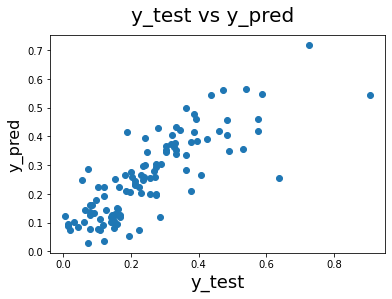

In [154]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [155]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred_m5, squared=False)

In [156]:
print("MSE: ", rms)

MSE:  0.09444107887381054



We can see that the equation of our best fitted line is:

$ price = 0.236  \times  area + 0.202  \times  bathrooms + 0.11 \times stories + 0.05 \times mainroad + 0.04 \times guestroom + 0.0876 \times hotwaterheating + 0.0682 \times airconditioning + 0.0629 \times parking + 0.0637 \times prefarea - 0.0337 \times unfurnished $


Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features (bathrooms/bedrooms, area/stories, etc.)
2. Build a non-linear model

# Asumptions

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [157]:
y_train_price = lr_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

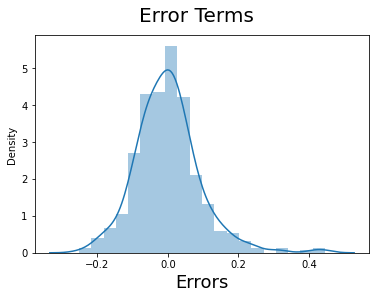

In [158]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0.5, 0, 'Errors')

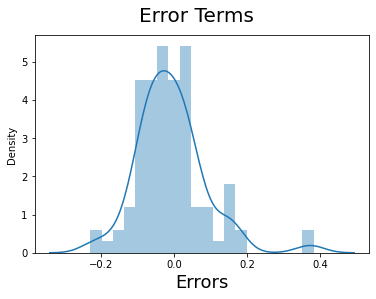

In [159]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test-y_pred_m5), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Homoscedasticity Assumption

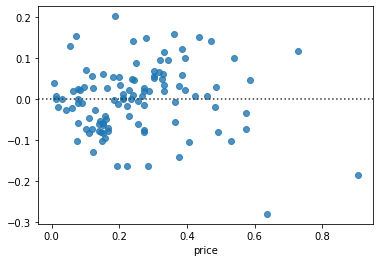

In [160]:
#on test data
sns.residplot(y_test,y_pred_m5)

## No Autocorrelation of the Error Terms

In [161]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(y_test-y_pred_m5)
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 2.3710189279520293
Little to no autocorrelation 

Assumption satisfied
